In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Center function from https://github.com/GAA-UAM/scikit-fda/blob/develop/skfda/preprocessing/dim_reduction/_fpca.py
class ExampleClass:
    def __init__(self, centering):
        self.centering = centering
        self.mean_ = None

    def _center_if_necessary(self, X: np.ndarray, *, learn_mean: bool = True) -> np.ndarray:
        if learn_mean:
            self.mean_ = X.mean()
        return X - self.mean_ if self.centering else X


In [3]:
# Toy Example
data_toy = np.array([1, 2, 3, 4, 5])
example_toy = ExampleClass(centering=True)
centered_data_toy= example_toy._center_if_necessary(data_toy)  # Should return data centered around its mean

print("Mean:", example_toy.mean_)  # Mean of the data
print("Centered Data:", centered_data_toy)  # Centered data

Mean: 3.0
Centered Data: [-2. -1.  0.  1.  2.]


# Using the function on A1_blood_cal_window data as example

In [4]:
# Imporitng the data and visualizing the first rows
A1_blood_cal_window = pd.read_csv("A1_blood_cal_window.csv")
A1_blood_cal_window.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,59.22988,59.26535,59.25194,59.26624,59.27370,59.25105,59.25015,59.26952,59.28681,59.27608,...,59.29337,59.28681,59.27966,59.28770,59.27161,59.27399,59.29426,59.29098,59.28741,59.27906
1,68.26662,68.23949,68.25797,68.25082,68.26304,68.25619,68.25946,68.25439,68.25082,68.24903,...,68.22906,68.19389,68.20222,68.19686,68.20968,68.19537,68.18971,68.19567,68.19925,68.19031
2,62.49413,62.47863,62.49026,62.49443,62.48519,62.49175,62.50129,62.47386,62.49622,62.50099,...,62.47208,62.47267,62.47088,62.46492,62.49086,62.46402,62.47833,62.47655,62.47267,62.47118
3,61.97111,61.96187,61.97289,61.96306,61.95054,61.97528,61.96902,61.94845,61.96455,61.98541,...,61.99823,61.99704,61.98363,62.00270,62.01075,62.00956,62.00419,62.00628,61.99734,61.99644
4,55.78556,55.76559,55.77603,55.79301,55.77245,55.77483,55.79272,55.78049,55.79003,55.81656,...,55.87320,55.86485,55.89198,55.89138,55.90419,55.89079,55.90300,55.88452,55.89555,55.90658


In [5]:
A1_blood_cal_window.iloc[0].mean() #row wise mean

59.273405609756104

In [6]:
A1_blood_cal_window.iloc[:,0].mean() #column wise mean

-20.006877513461536

In [7]:
# centering the data to see the behaviour of the function
data = A1_blood_cal_window
example = ExampleClass(centering=True)
centered_data = example._center_if_necessary(data)  # Should return data centered around its mean
print("Mean:", example.mean_)  # Mean of the data (after assesing is a column wise mean, this is by timestamps)

Mean: 0    -20.006878
1    -19.994192
2    -19.980433
3    -19.967004
4    -19.955013
5    -19.941915
6    -19.929495
7    -19.916723
8    -19.902390
9    -19.889526
10   -19.877158
11   -19.862331
12   -19.849412
13   -19.838506
14   -19.823753
15   -19.812589
16   -19.799562
17   -19.786560
18   -19.773618
19   -19.761463
20   -19.748520
21   -19.736209
22   -19.723164
23   -19.711978
24   -19.696900
25   -19.684885
26   -19.672771
27   -19.661233
28   -19.649098
29   -19.636577
30   -19.622199
31   -19.611235
32   -19.598508
33   -19.585865
34   -19.572503
35   -19.560986
36   -19.550381
37   -19.537766
38   -19.525646
39   -19.512486
40   -19.501006
dtype: float64


In [23]:
print(centered_data.iloc[:,:5].head(5))

           0          1          2          3          4
0  79.236758  79.259542  79.232373  79.233244  79.228713
1  88.273498  88.233682  88.238403  88.217824  88.218053
2  82.501008  82.472822  82.470693  82.461434  82.440203
3  81.977988  81.956062  81.953323  81.930064  81.905553
4  75.792438  75.759782  75.756463  75.760014  75.727463


In [9]:
def plot_all_time_series_and_mean_fpca(df, title, x_new, y_new):
    """
    Plots all time series data from a DataFrame and adds a new curve.

    Parameters:
    df (pd.DataFrame): A pandas DataFrame where each row represents a time series. The values in the rows are the
                       data points of the time series.
    title (str): The title for the plot.
    x_new (array-like): The x values for the mean from the fpca.
    y_new (array-like): The y values for the mean from the fpca.

    Returns:
    Displays the chart with all the time series and the new curve in one plot.
    """
    plt.figure(figsize=(6, 4))

    # Generate colors using a colormap
    num_lines = len(df)
    colors = plt.cm.Greys(np.linspace(0, 1, num_lines))

    # Plot each row with a different color
    for index, (i, row) in enumerate(df.iterrows()):
        plt.plot(row.values, label=f'Time Series {i + 1}', color=colors[index])

    # Add the new curve
    plt.plot(x_new, y_new, label='New Curve', color='red', linewidth=2)
    #plt.legend(title="Mean") 
    plt.ylabel('Electrical signals (mV)')
    plt.xlabel('Time (s)')
    plt.title(title)
    plt.show()



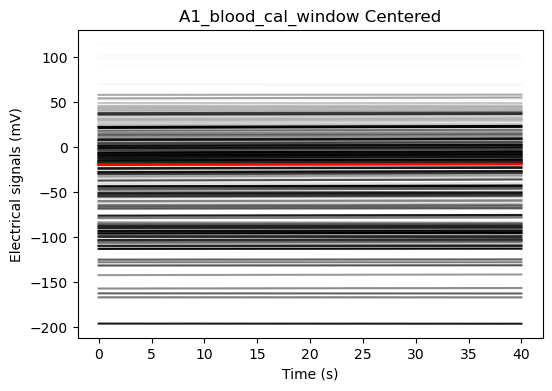

In [10]:
# Original data 
plot_all_time_series_and_mean_fpca(A1_blood_cal_window, 'A1_blood_cal_window Centered', range(0,41), example.mean_)

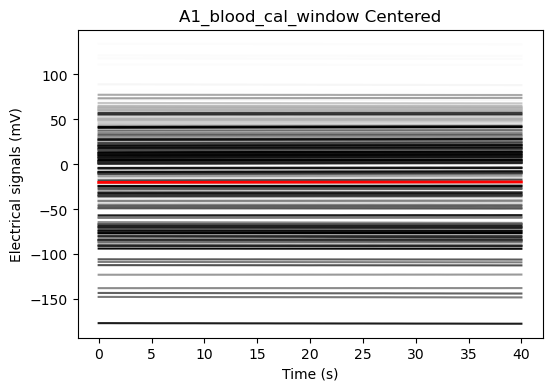

In [11]:
# Centered data
plot_all_time_series_and_mean_fpca(centered_data, 'A1_blood_cal_window Centered', range(0,41), example.mean_)

# Zero start

In [12]:
# Put the beginning of all sensor data at the same value (zero)
A1_blood_cal_window_zero = A1_blood_cal_window.iloc[:, 1:].sub(A1_blood_cal_window.iloc[:, 1], axis=0)

data_zero = A1_blood_cal_window_zero
example_zero = ExampleClass(centering=True)
centered_data_zero = example_zero._center_if_necessary(data_zero)  # Should return data centered around its mean

print("Mean:", example_zero.mean_)  # Mean of the data
print("Centered Data:", centered_data_zero)  # Centered data

Mean: 1     0.000000
2     0.013759
3     0.027188
4     0.039179
5     0.052277
6     0.064697
7     0.077469
8     0.091802
9     0.104666
10    0.117034
11    0.131861
12    0.144780
13    0.155686
14    0.170439
15    0.181602
16    0.194630
17    0.207632
18    0.220574
19    0.232729
20    0.245672
21    0.257983
22    0.271028
23    0.282213
24    0.297292
25    0.309307
26    0.321421
27    0.332959
28    0.345094
29    0.357615
30    0.371993
31    0.382957
32    0.395684
33    0.408327
34    0.421689
35    0.433206
36    0.443811
37    0.456426
38    0.468546
39    0.481706
40    0.493186
dtype: float64
Centered Data:        1         2         3         4         5         6         7  \
0    0.0 -0.027169 -0.026298 -0.030829 -0.066577 -0.079897 -0.073299   
1    0.0  0.004721 -0.015858 -0.015629 -0.035577 -0.044727 -0.062569   
2    0.0 -0.002129 -0.011388 -0.032619 -0.039157 -0.042037 -0.082239   
3    0.0 -0.002739 -0.025998 -0.050509 -0.038867 -0.057547 -0.090889   
4   

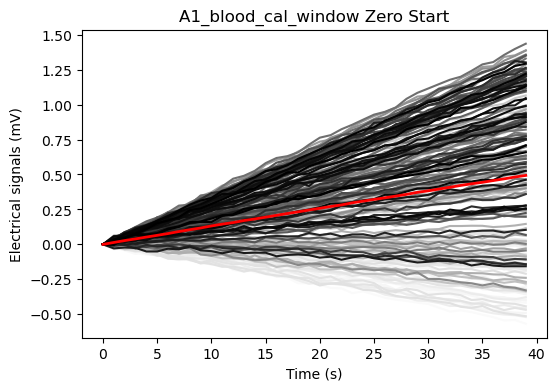

In [13]:
# Zero start data
plot_all_time_series_and_mean_fpca(A1_blood_cal_window_zero, 'A1_blood_cal_window Zero Start', range(0,40), example_zero.mean_)

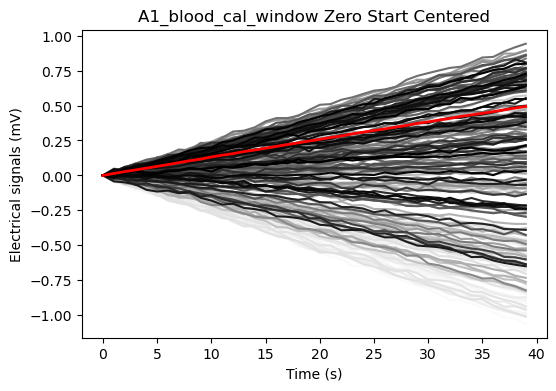

In [14]:
# Zero start data Centered
plot_all_time_series_and_mean_fpca(centered_data_zero, 'A1_blood_cal_window Zero Start Centered', range(0,40), example_zero.mean_)

# Differenced Data

In [15]:
A1_blood_cal_window_diff = A1_blood_cal_window.diff(axis=1)
A1_blood_cal_window_diff = A1_blood_cal_window_diff.fillna(0)

data_diff = A1_blood_cal_window_diff
example_diff = ExampleClass(centering=True)
centered_data_diff = example_diff._center_if_necessary(data_diff)  # Should return data centered around its mean

print("Mean:", example_diff.mean_)  # Mean of the data
print("Centered Data:", centered_data_diff)  # Centered data

Mean: 0     0.000000
1     0.012686
2     0.013759
3     0.013429
4     0.011991
5     0.013098
6     0.012420
7     0.012772
8     0.014333
9     0.012864
10    0.012369
11    0.014827
12    0.012919
13    0.010906
14    0.014753
15    0.011163
16    0.013028
17    0.013002
18    0.012942
19    0.012154
20    0.012943
21    0.012311
22    0.013045
23    0.011185
24    0.015078
25    0.012015
26    0.012114
27    0.011539
28    0.012135
29    0.012521
30    0.014378
31    0.010964
32    0.012728
33    0.012643
34    0.013362
35    0.011517
36    0.010605
37    0.012616
38    0.012119
39    0.013160
40    0.011481
dtype: float64
Centered Data:        0         1         2         3         4         5         6  \
0    0.0  0.022784 -0.027169  0.000871 -0.004531 -0.035748 -0.013320   
1    0.0 -0.039816  0.004721 -0.020579  0.000229 -0.019948 -0.009150   
2    0.0 -0.028186 -0.002129 -0.009259 -0.021231 -0.006538 -0.002880   
3    0.0 -0.021926 -0.002739 -0.023259 -0.024511  0.011642 -0

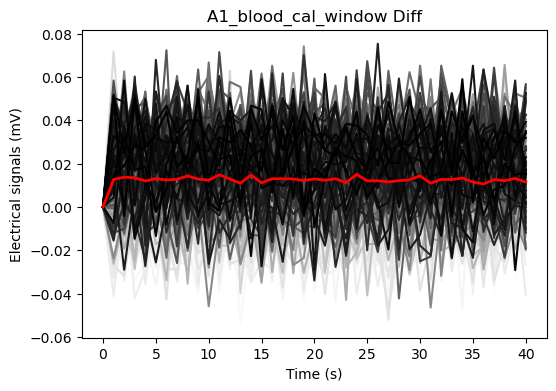

In [16]:
# Differenciated data
plot_all_time_series_and_mean_fpca(A1_blood_cal_window_diff, 'A1_blood_cal_window Diff', range(0,41), example_diff.mean_)

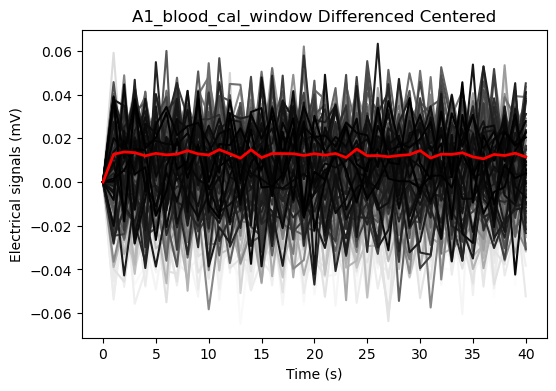

In [17]:
# Differenced data centered
plot_all_time_series_and_mean_fpca(centered_data_diff, 'A1_blood_cal_window Differenced Centered', range(0,41), example_diff.mean_)

# Note: observe in this case the y-axis shrinks from 0.08 to 0.06 after centering